PROJECT PLAN
Project Scoping
1. Load and browse the dataset, inspect its shape, features, data types
2. Formulate valid questions to analyze through the available data
Data analysis
3. Data cleanup
4. Data analysis (relationships)
Machine learning
5. Feature engineering
6. Hyperparameter tuning
7. Creating and evaluating the model

# INTRODUCTION


This project analyzes data from on-line dating application OKCupid. The dataset has been provided by Codecademy and the project will focus on summarizing the available data, formulating valid questions pertaining to the available data and finally building and testing a machine learning model to answer the formulated questions. Particularly, the project will focus on predicting the zodiac sign based on the personal data provided by a user.

# PROJECT SCOPING

## Loading and summarizing the data

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
data_file = pd.read_csv('profiles.csv')
print(f'DataFrame columns: {data_file.shape[1]}')
print(f'DataFrame rows: {data_file.shape[0]}')
print('DataFrame info:')
print(data_file.info())



DataFrame columns: 31
DataFrame rows: 59946
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null 

DataFrame sample:

In [10]:
data_file.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


First glance at the data shows a number of features that can be ignored for our purposes, specifically the "essay" comments and the "last online" information.

In [16]:
#features_of_interest = ['body_type', 'job','diet', 'drinks', 'drugs', 'education', 'orientation','sex', 'smokes', 'status', 'religion', 'ethnicity']
#removing unwanted features
data_file = data_file.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9','last_online'])


Since most of the available features are of an "object" type, let's see how many unique values they hold.

In [18]:
print(data_file['age'].dtype)
print(data_file['job'].dtype)

int64
object


In [34]:
unique_dict = {}
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        uniques= data_file[i].unique()
        nuniques= data_file[i].nunique()
        unique_dict[i] = nuniques
        print(f'''{i} has {nuniques} unique values: 
        {uniques}''')
print('###########SUMMARY##########')
print(unique_dict)

body_type has 12 unique values: 
        ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet has 18 unique values: 
        ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks has 6 unique values: 
        ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs has 3 unique values: 
        ['never' 'sometimes' nan 'often']
education has 32 unique values: 
        ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out o

Some object type features have many more unique values than anticipated: 217 unique values for ethnicity, 48 unique values for the zodiac sign and 7647 unique values for the spoken language are especially surprising. This is due to providing a combination of answers, e.g. mixed ethnicities and languages, commenting on your zodiac sign etc. These values need to be generalized in order to make them valuable for data modeling.

In [42]:
#we will modify the "speaks" feature to reflect only the first language provided
def leave_first_word(x):
    x_mod = str(x).split()[0]
    x_mod = x_mod.split(',')[0]
    return x_mod

data_file['speaks'] = data_file['speaks'].apply(leave_first_word)
data_file['sign'] = data_file['sign'].apply(leave_first_word)

def split_by_comma(x):
    x_mod = str(x).split(',')[0]
    return x_mod
data_file['ethnicity'] = data_file['ethnicity'].apply(split_by_comma)

unique_dict = {}
for i in data_file.columns:
    if data_file[i].dtype == 'object':
        uniques= data_file[i].unique()
        nuniques= data_file[i].nunique()
        unique_dict[i] = nuniques
        print(f'''{i} has {nuniques} unique values: 
        {uniques}''')
print('###########SUMMARY##########')
print(unique_dict)

body_type has 12 unique values: 
        ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet has 18 unique values: 
        ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks has 6 unique values: 
        ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs has 3 unique values: 
        ['never' 'sometimes' nan 'often']
education has 32 unique values: 
        ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out o

{'body_type': 12, 'diet': 18, 'drinks': 6, 'drugs': 3, 'education': 32, 'ethnicity': 217, 'job': 21, 'location': 199, 'offspring': 15, 'orientation': 3, 'pets': 15, 'religion': 45, 'sex': 2, 'sign': 48, 'smokes': 5, 'speaks': 7647, 'status': 5}


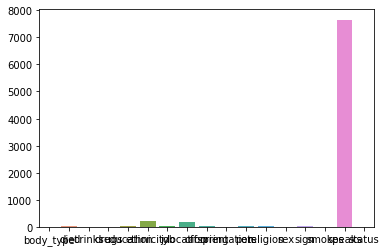

In [32]:

#
sns.barplot(x=list(unique_dict.keys()),y=list(unique_dict.values()))
plt.show()

Possible predictions:
1. Predict the zodiac sign
2. Predict sex
3. Predict religion
4. Predict drugs
5. Predict your ideal partner's age based on other criteria
6. Predict your ideal partner's religion based on other criteria

Question to analyze:
Build a model that predicts a zodiac sign based on the data

Steps:
1. Cleanup data
2. Select features
3. Select model
4. Select hyperparameters

## DATA CLEANUP

AIs:
1. Handle nans
2. Check for outliers
3. Create bins/categories

Data Cleanup:



age          59946 non-null  int64  - check data distribution
body_type    54650 non-null  object - create categories, check distribution
diet         35551 non-null  object - bin data, check distribution
drinks       56961 non-null  object - create categories, check distribution
drugs        45866 non-null  object - create categories, check distribution
education    53318 non-null  object - bin data, check distribution
ethnicity    54266 non-null  object - ? too many combinations
height       59943 non-null  float64 - check data distribution
income       59946 non-null  int64  - check data distribution
job          51748 non-null  object - check data distribution
last_online  59946 non-null  object - disregard
location     59946 non-null  object - bin data, check distribution
offspring    24385 non-null  object - check data distribution, probably disregard due to high nan count
orientation  59946 non-null  object  - check data distribution
pets         40025 non-null  object  - check data distribution
religion     39720 non-null  object  - check data distribution
sex          59946 non-null  object  - check data distribution
sign         48890 non-null  object  - check data distribution
smokes       54434 non-null  object - create categories, check distribution
speaks       59896 non-null  object - bin data, check distribution
status       59946 non-null  object - check data distribution

In [10]:
for i in data_file.columns:
    nans = np.round(data_file[i].isna().sum() / len(data_file) * 100, 2)
    print(f'{i} nans: {nans}')

age nans: 0.0
body_type nans: 8.83
diet nans: 40.69
drinks nans: 4.98
drugs nans: 23.49
education nans: 11.06
ethnicity nans: 9.48
height nans: 0.01
income nans: 0.0
job nans: 13.68
location nans: 0.0
offspring nans: 59.32
orientation nans: 0.0
pets nans: 33.23
religion nans: 33.74
sex nans: 0.0
sign nans: 18.44
smokes nans: 9.19
speaks nans: 0.08
status nans: 0.0


In [ ]:
# data.dropna(subset=['Height','Education'], #only looks at these two columns
#             inplace=True, #removes the rows and keeps the data variable
#             how='any') #removes data with missing data in either field

In [17]:
#inspecting high nan features:
#body_type - turn nans into new category
#diet - turn into "mostly anything"
#drinks - turn into "socially"
print(data_file.body_type.unique())

['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
